In [1]:
import nilearn.image as nimg
import numpy as np
import importlib
import pandas as pd
import copy
import confounds.designs as designs
import confounds.spectral_interpolation as spectral_interp
from confounds import censor_method
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib

<AxesSubplot:>

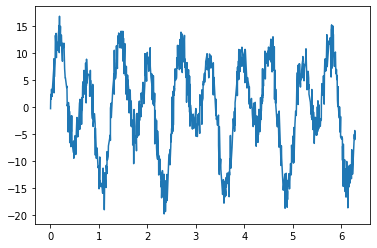

In [2]:
# Simulate randomly sampled time-points
np.random.seed(0)
n = 1000
t = np.sort(np.random.uniform(0, 2*np.pi, n))
ts = 10*np.random.uniform()*np.sin(4.8 * t) + \
    15*np.random.uniform()*np.sin(2 * t) + \
    np.sin(0.2 * t) + \
    20*np.random.uniform()*np.sin(10 * t) + \
    np.random.normal(0, 2, size=(20,n))

x48 = 10*np.sin(4.8 * t) + np.random.normal(0, 2, n)
ts = ts - ts.mean(axis=1)[:,np.newaxis]

sns.lineplot(x=t, y=ts[0,:])

`lombscargle_interpolate` correctly interpolates values

In [3]:
# Set up lombscargle variables
t = t
s = t
x = ts

In [4]:
reconstructed_signal = spectral_interp.lombscargle_interpolate(t,x,s)

<AxesSubplot:>

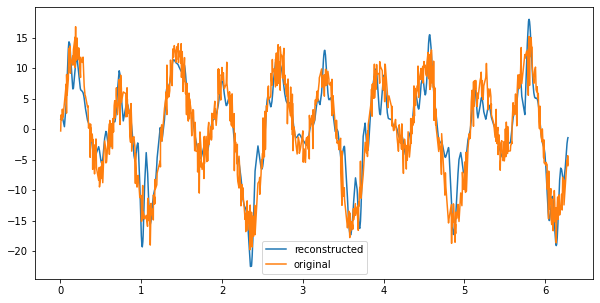

In [5]:
a = ts[0,:]
b = reconstructed_signal[0,:]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.lineplot(x=t,y=b,ax=ax,label="reconstructed")
sns.lineplot(x=t,y=a,ax=ax,label="original")
